In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#matplotlib mac에서 한글폰트 나오게하기
#import matplotlib.font_manager as fm
#font_location='/Library/Fonts/NanumBarunGothic.otf'
#font_name=fm.FontProperties(fname=font_location).get_name()
#mpl.rc('font',family=font_name) 


#과학적 표기법 사용하지 않기
pd.options.display.float_format = '{:.2f}'.format

#생략없이 출력
pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 30000)
pd.set_option('display.width', 30000)

In [2]:
import glob
from google.cloud import bigquery
from google.oauth2 import service_account
key_path = glob.glob('/Users/buttercup/Downloads/playhardlab-dw-1-5adc1e9cf364.json')[0]
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials = credentials, 
                         project = credentials.project_id)




In [3]:
#moloco af_purchase 
sql= f"""
SELECT app_id,event_date,media_source,campaign,geo,
      sum(event_count) af_purchase
FROM `playhardlab-dw-1.UA_log.Appsflyer_Cohort_UA` 
WHERE 
      event_date between "2023-02-01" and current_date()
      and
      app_id='com.playhardlab.rich'
      and
      event_name='af_purchase'
      and
      media_source='moloco_int'
      and
      campaign='RT_AOS_ROAS(IAP)_EU(7)_230201'
Group by 1,2,3,4,5
order by event_date desc
"""

In [4]:
query_job = client.query(sql)

In [5]:
df = query_job.to_dataframe()

In [13]:
df

,app_id,event_date,media_source,campaign,geo,af_purchase
0,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,ES,8
1,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,NL,12
2,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,DE,9
3,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,UK,35
4,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,NO,4
5,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,FR,7
6,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,PL,5
7,com.playhardlab.rich,2023-03-10,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,FR,10
8,com.playhardlab.rich,2023-03-10,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,DE,16
9,com.playhardlab.rich,2023-03-10,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,PL,3


In [14]:
b

In [37]:
pivot_df = df.groupby(['event_date', 'geo'])['af_purchase'].sum().reset_index().pivot('event_date', 'geo', 'af_purchase').fillna(0)

In [38]:
pivot_df

geo,DE,ES,FR,NL,NO,PL,UK
event_date,,,,,,,
2023-02-01,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2023-02-02,5.00,0.00,0.00,1.00,0.00,5.00,2.00
2023-02-03,0.00,0.00,0.00,0.00,0.00,0.00,3.00
2023-02-04,2.00,0.00,0.00,6.00,0.00,4.00,5.00
2023-02-05,1.00,0.00,2.00,3.00,0.00,9.00,1.00
2023-02-06,1.00,0.00,0.00,5.00,2.00,5.00,1.00
2023-02-07,2.00,0.00,0.00,1.00,0.00,3.00,2.00
2023-02-08,4.00,0.00,0.00,4.00,2.00,4.00,1.00
2023-02-09,4.00,1.00,0.00,0.00,0.00,2.00,6.00


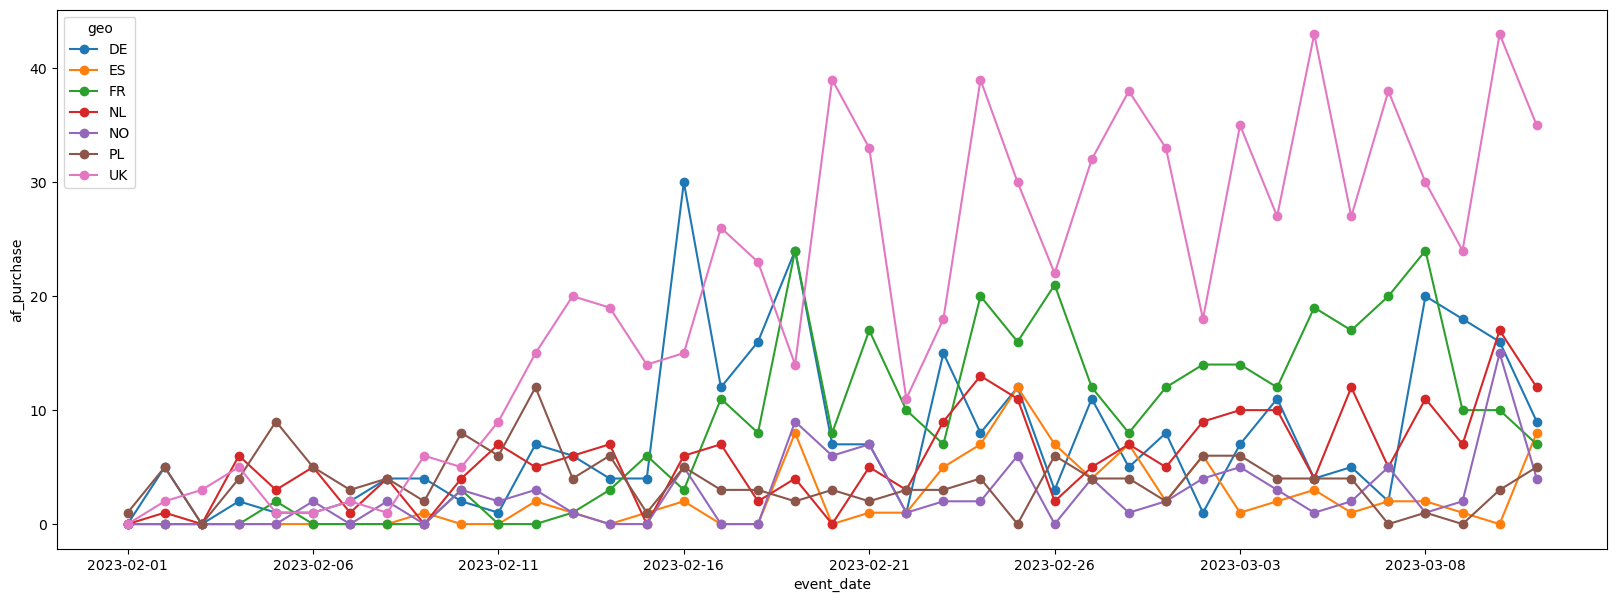

In [39]:
fig, ax = plt.subplots(figsize=(20, 7)) 
pivot_df.plot.line(marker='o', ax=ax)
plt.xlabel('event_date')
plt.ylabel('af_purchase')
plt.show()

In [40]:
#moloco revenue
r_sql= f"""
SELECT app_id,event_date,media_source,campaign,geo,
      Round(sum(revenue_usd),2) revenue
FROM `playhardlab-dw-1.UA_log.Appsflyer_Cohort_UA` 
WHERE 
      event_date between "2023-02-01" and current_date()
      and
      app_id='com.playhardlab.rich'
      and
      event_name='af_purchase'
      and
      media_source='moloco_int'
      and
      campaign='RT_AOS_ROAS(IAP)_EU(7)_230201'
Group by 1,2,3,4,5
order by event_date desc
"""

In [41]:
query_job_r = client.query(r_sql)

In [42]:
df_r = query_job_r.to_dataframe()

,app_id,event_date,media_source,campaign,geo,revenue
0,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,ES,85.17
1,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,NL,268.44
2,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,DE,85.16
3,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,UK,257.22
4,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,NO,32.95
5,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,FR,129.95
6,com.playhardlab.rich,2023-03-11,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,PL,32.44
7,com.playhardlab.rich,2023-03-10,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,FR,140.88
8,com.playhardlab.rich,2023-03-10,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,DE,158.83
9,com.playhardlab.rich,2023-03-10,moloco_int,RT_AOS_ROAS(IAP)_EU(7)_230201,PL,12.84


In [44]:
df_r['revenue'] = df_r['revenue'].astype('int32')

In [45]:
pivot_df_r = df_r.groupby(['event_date', 'geo'])['revenue'].sum().reset_index().pivot('event_date', 'geo', 'revenue').fillna(0)

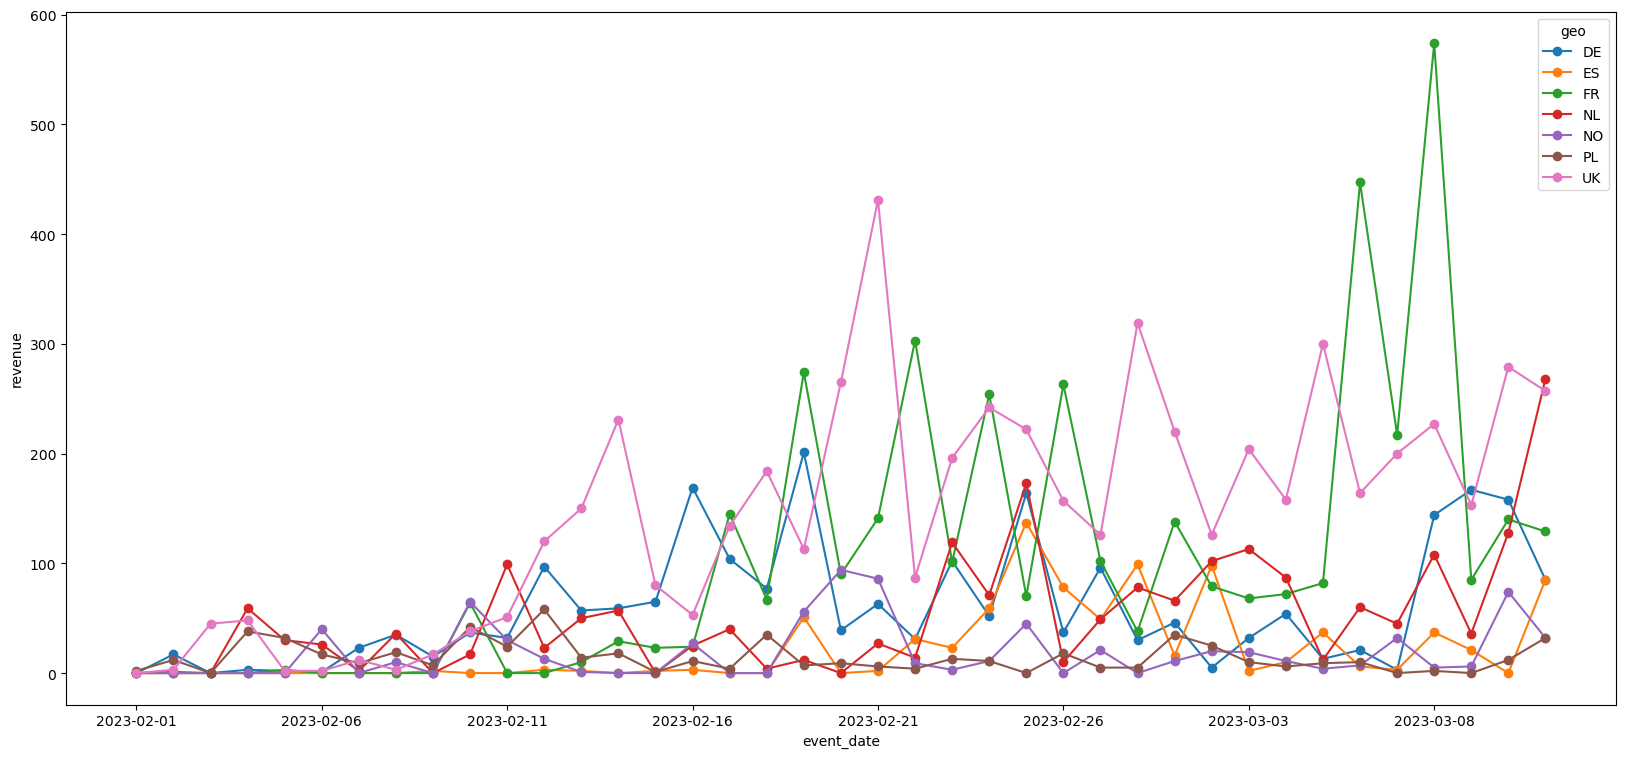

In [50]:
fig, ax = plt.subplots(figsize=(20, 9)) 
pivot_df_r.plot.line(marker='o', ax=ax)
plt.xlabel('event_date')
plt.ylabel('revenue')
plt.show()